## DTMF Project Part 3: Decoding single digit DTMF sound files from your data base

In [1]:
# Import libraries here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import random
import statistics
from statistics import stdev
from collections import Counter
from scipy.io import wavfile

Note: (please read) 
 - I have given some long comments in the cells. Make sure you read them by scrolling horizontally.
 - Note that we had used 10 instead of * and 11 instead of # to avoid errors. So later on in the notebook when checkong the 
   digits * and 10 mean the same thing, the same is for # and 11
 - In task 3, I have provided code that will take an input, So while running the whole notebook, it will stap at that cell for 
   your input (don't think that the code is broken). I thought it will be a nice touch to add that. The input is basically the 
   index number, it will index the signal at that index number and calculate the digit using fft.
 - I have changed the noise array shape in task 5 to add it successfully

### Objective
In the second part of the project you created a data base consisting of 10000 samples of single digit signals. In this part, your task is to decode the signals, i.e. recovering the digit (or *, #) that it represents.

Remember: You need to provide references for all sources that you use.

#### References

https://www.youtube.com/watch?v=oSePgYOYA_s&t=2s

https://www.youtube.com/watch?v=HEcdmDSVHsE&t=775s

https://www.youtube.com/watch?v=VNBkH-YppJw&t=2s

https://www.youtube.com/watch?v=b06pFMIRO0I

### Tasks (30 points)

#### Task-1 (5 points)
Read in your dataset. From the dataset select a single signal and graph it for the duration of 10 milliseconds.


In [2]:
# Complete Task 1 here
y_list_df = pd.read_csv('y_list_df.csv')
y_list_df.head()

,Digit,f1,f2,y1,y2,y3,y4,y5,y6,y7,...,y7991,y7992,y7993,y7994,y7995,y7996,y7997,y7998,y7999,y8000
0,1,697,1209,-0.120419,-0.163976,0.049633,0.418658,0.653887,0.514774,0.023346,...,0.408205,0.770016,0.702241,0.250148,-0.278982,-0.552069,-0.456734,-0.161366,0.051558,0.031992
1,1,697,1209,-0.069374,-0.321847,-0.274143,-0.082703,0.000846,-0.133197,-0.349265,...,0.259985,0.140301,-0.230882,-0.612728,-0.695967,-0.358515,0.217131,0.667339,0.716946,0.379699
2,4,770,1209,-0.320944,0.176819,0.654289,0.771709,0.423999,-0.168948,-0.620973,...,0.517673,0.443133,0.155823,-0.069272,-0.077444,0.048282,0.088424,-0.088919,-0.382926,-0.527508
3,1,697,1209,0.650034,0.317849,-0.250908,-0.697232,-0.738947,-0.380003,0.104167,...,-0.444908,-0.534687,-0.313351,-0.034452,0.060071,-0.055300,-0.183965,-0.100815,0.225239,0.575883
4,0,941,1336,0.071497,0.255474,0.268248,-0.041680,-0.474030,-0.619949,-0.259269,...,0.673043,0.705783,0.222909,-0.341949,-0.546835,-0.319830,0.038541,0.194855,0.103728,-0.004815


In [3]:
#Determinig the size of the data frame (which is supposed to be 10000, but our laptops don't have enough power to support such heavy calculations.) 
#Hence when running it on your end kindly change it to 10000 or any other desired number
# Here it will take the same value that was assigned in part 2
size = int(len(y_list_df))

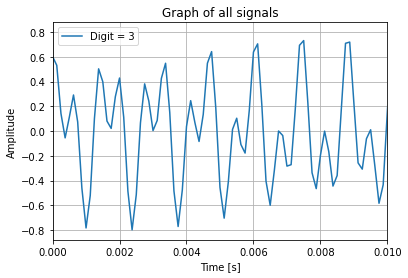

In [4]:
y_name = []
for i in range(8000):
    y_name.append('y{}'.format(i+1))

fs=8000
t=np.arange(0,1,1/fs)

d = random.randint(0,size)

plt.plot(t,y_list_df.loc[d, y_name], label = "Digit = {}".format(y_list_df['Digit'][d]))
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.title("Graph of all signals")
plt.grid()
plt.legend()
plt.xlim([0,0.01])
plt.show()

#### Task-2  (5 points): 
Collect ideas how you want to recover the digit from the signal. This step is called brainstorming. I want to hear YOUR ideas, not what you found on the Internet. Provide a list of 5 different ideas on how to recover the digit. Keep in mind that you will have to implement your ideas in Python, so ideas like "train your ear by listening to sounds of known digits and then listen to a sound of an unknown digit and decide which one it was" will not work. You need to use features that are quantifiable. 

In the step of brainstorming, everyone contributes and you collect ideas without critizising or discussing them. Once you have collected "enough" ideas, describe the five best.

**YOUR ANSWER GOES HERE**

**We had the following ideas and then we chose the best one to do our task 3.**

 - 1. To identify the digit of the a signal first plot the graph of the signal wave along the time. We calculate the time period       of the signal and then using F =1/T formula we determine the frequency of the signal. And then match with the digit             frequencies to find out the digit.
 
 - 2. To write a function where if we input the signal as a parameter it will return the frequency of the signal by 
      going through the dataframe for which we can make a for loop. 
 
 - 3. From the given equation in part 2, we will do a reverse calculation and subject the frequency. Then calculate the               frequency of the signals by putting the values of phi, A and time(t) for the selected signal.
 
 - 4. Idea was to get the lowest points in the graphs of signals per 0.01 seconds and finding the difference between them,       
      theoretically getting the time passed between a full period of the wave to do f = 1/T. However, it didn't to work as it 
      gave frequencies in the 200 range instead of the desires 1400+ range.
 
 - 5. To make use of the fourier transform series. I had read about the fourier transform series in my highschool. The fourier   
      transform gives us insight into what frequencies make up a signal. I had learnt that we can use this technique to 
      change the representation of a complex sinusoidal curve from its time domain to its frequency domain. So my plan is to           see that if we can apply the fourier transform formulae to the signals.

#### Task-3  (10 points): 
Implement an algorithm that correctly decodes the digit from a given signal. Before you get started, you need to describe which approach from your list you implement. Also, for each step, provide comments.

If you want to, each team member can implement a separate approach and you can then compare and discuss results. When using concepts learned throughout the semester, refer to them and use the same "language".

I need to be able to follow your code and understand what you intend to do. If your approach does not work, I still want to hear about it. Tell me what you learned while you were implementing your ideas and why your approach did not / cannot work.

The successful completion of this task includes the demonstration of each digit (and *, #) being decoded correctly.

In [5]:
# COMPLETE TASK-3 HERE
# We discovered that python lets us do a fourier transform very easily using the fft function hence we went ahead with that idea

In [6]:
#creating a dataframe with all the digits and its frequencies. (we have used 10 instead of * and 11 instead of # to avoid errors)
digit = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 0, 11]
f1 = [697, 697, 697, 770, 770, 770, 852, 852, 852, 941, 941, 941]
f2 = [1209, 1336, 1477, 1209, 1336, 1477, 1209, 1336, 1477, 1209, 1336, 1477]
digit_table = list(zip(digit,f1,f2))
digit_df = pd.DataFrame(data = digit_table, columns=['digit', 'f1', 'f2'])

# Generating an array of y values (all the 8000 datapoint) from the y_list_df. (This part usually requires a lot of power, so if it doesnt run properly, try reducing the size in part 2 and then run both the files again)
y_list = []
r = 0
for i in range(size):
    yq_list = []
    for i in range(8000):
        yq_list.append(y_list_df.loc[r, 'y{}'.format(i+1)])
    r = r+1
    y_list.append(yq_list)
y_list = np.array(y_list)

In [7]:
# Takes one signal and gives the corrosponding digit
# Defining a function that would take an index position number as the input and will give the digit that corrosponds with the signal of that index value.
def frequency(): #Takes index as the input
    n = (int(input('Enter Index Number (From 0 to {}) : '.format(size))))
    x = np.fft.fft(y_list[n]) # using fast fourier transform
    x_mag = abs(x) # coverting the fast fourier transform from complex numbers to absolute values
    frq = []
    for i in range(4000): # using 4000 since fft reapeats itself after half the datapoints (so 8000/2 = 4000)
        if x_mag[i] > 420: # defining a limit below which it must ignore the amplitudes.
            frq.append(i)
    digit_fft = int(digit_df[digit_df['f1']==frq[0]][digit_df[digit_df['f1']==frq[0]]['f2']==frq[1]]['digit']) #indexing the digit_df to get the corrosponding digit of the given frequencies
    if digit_fft==10 or digit_fft==11:
        if digit_fft==10:
            digit_fft = '*'
        else:
            digit_fft = '#' 
    actual_digit = y_list_df['Digit'][n] # also indexing the actual digit from the y_list_df to cross check
    print('The calculated digit is = {}'.format(digit_fft))
    print('The actual digit is = {}'.format(actual_digit))
    return [digit_fft, actual_digit]
frequency()

Enter Index Number (From 0 to 100) : 69
The calculated digit is = 7
The actual digit is = 7


[7, 7]

In [8]:
# Demonstration
# Creating a function that will retrive the signal for all of the 12 unique digits from the y_list_df, and give the corrospondig digit of those signals.
def demonstrate():
    
    def indx_list(): # function for the list of index values of each of the unique digits
        indx_list = []
        for i in range(12):
            indx = int(y_list_df[y_list_df['Digit']==i].index[0])
            indx_list.append(indx)
        return indx_list

    def frequency_demon(n): # function for determinig the digit using fft (Takes index as the input)
        x = np.fft.fft(y_list[n])
        x_mag = abs(x)
        frq = []
        for i in range(4000):
            if x_mag[i] > 420:
                frq.append(i)
        digit_fft = int(digit_df[digit_df['f1']==frq[0]][digit_df[digit_df['f1']==frq[0]]['f2']==frq[1]]['digit'])
        if digit_fft==10 or digit_fft==11:
            if digit_fft==10:
                digit_fft = '*'
            else:
                digit_fft = '#' 
        actual_digit = y_list_df['Digit'][n]
        return [digit_fft, actual_digit]


    def demon_list(): # function to create a list of calculated digits and the actual digits
        demon_list = []
        for i in indx_list():
            digit = frequency_demon(i)
            demon_list.append(digit)
        return demon_list
    
    # creating a dataframe to represent the demonstartion
    demon_df = pd.DataFrame(data = demon_list(), columns=['Calculated Digit', 'Actual digit'])
    demon_df.insert(0, "Index position", indx_list(), True)
    print("Note that we had used 10 instead of * and 11 instead of # to avoid errors in the digit_df")
    return demon_df

demonstrate()

Note that we had used 10 instead of * and 11 instead of # to avoid errors in the digit_df


,Index position,Calculated Digit,Actual digit
0,4,0,0
1,0,1,1
2,5,2,2
3,8,3,3
4,2,4,4
5,6,5,5
6,25,6,6
7,12,7,7
8,20,8,8
9,10,9,9


#### Task-4  (5 points): 
Test all 10000 signals from your data base. For each digit, state the percentage of correct determination of the number that it represents.

In [9]:
# COMPLETE TASK-4 HERE
test_all = []

def frequency_all(n): # function for determinig the digit using fft (Takes index as the input)
    x = np.fft.fft(y_list[n])
    x_mag = abs(x)
    frq = []
    for i in range(4000):
        if x_mag[i] > 420:
            frq.append(i)
    digit_fft = int(digit_df[digit_df['f1']==frq[0]][digit_df[digit_df['f1']==frq[0]]['f2']==frq[1]]['digit'])
    actual_digit = y_list_df['Digit'][n]
    return [digit_fft, actual_digit]

for n in range(size): # function to create a list of all calculated digits and the actual digits
    test_all.append(frequency_all(n))

# creating a dataframe to represent the result
test_all = np.array(test_all)
test_all_df = pd.DataFrame(data = test_all, columns=['Calculated Digit', 'Actual Digit'])
#print(test_all_df.info())
test_all_df.head()

,Calculated Digit,Actual Digit
0,1,1
1,1,1
2,4,4
3,1,1
4,0,0


In [10]:
# Testing accuracy for each digit and stating the percentage of correct determination of the number that it represents.
total_p = []
for i in range(12):
    total = []
    a = (test_all_df[test_all_df['Calculated Digit']==i].index)
    #total_p.append(i)
    for i in a:
        f = int(test_all_df['Calculated Digit'][i])==int(test_all_df['Actual Digit'][i])
        total.append(f)
    total_p.append(total)
total_p = np.array(total_p)

digit_percentage = []
for i in range(12):
    p = (len(total_p[i])/np. count_nonzero(total_p[i]))*100
    digit_percentage.append(p)
digit_percentage = np.array(digit_percentage)

print("Accuracy per digit")
total_p_df = pd.DataFrame(data = digit_percentage, columns=['Accuracy in %'])
total_p_df = total_p_df.rename_axis("Digit", axis="columns")
total_p_df

Accuracy per digit


Digit,Accuracy in %
0,100.0
1,100.0
2,100.0
3,100.0
4,100.0
5,100.0
6,100.0
7,100.0
8,100.0
9,100.0


In [11]:
# Creating an numpy array with boolean values to check if all the Calculated Digit matches with the Actual Digit to calculate the total percentage
total = []
for i in range(size):
    f = int(test_all_df['Calculated Digit'][i])==int(test_all_df['Actual Digit'][i])
    total.append(f)
total = np.array(total)
count = np.count_nonzero(total)
percentage = (count/size)*100
print("The total percentage accuracy is", percentage,  "%")

The total percentage accuracy is 100.0 %


**YOUR ANSWER GOES HERE**

#### Task-5 (5 points):
In a real-world system the signals being decoded will be corrupted by noise. In this task you are testing to what extend your approach is robost to noise. 

You are basically repeating **Task-4** but before you are starting your algorithm, you are adding noise to your signal.

noise = A*np.random.randn(1, 1000)

creates a one-dimensional array of size 1x1000 with normally distributed values. By making the amplitude A larger or smaller you adjust the noise amplitude.

How robost is your algorithm to noise? How did you test it? 

In [12]:
# COMPLETE TASK-5 HERE

In [13]:
print('y_list shape :', y_list.shape)

AN = 0.4 # Amplitude of the noice (we can change it to whatever we want, to test how robust our program is)

noise = AN*np.random.randn(size, 8000)
print('noise shape :', noise.shape)

y_list_noise = y_list + noise
print('y_list_noise shape :', y_list_noise.shape)

y_list shape : (100, 8000)
noise shape : (100, 8000)
y_list_noise shape : (100, 8000)


In [14]:
test_all_noise = []

def frequency_all_noise(n): # function for determinig the digit using fft (Takes index as the input)
    x = np.fft.fft(y_list_noise[n])
    x_mag = abs(x)
    frq = []
    for i in range(4000):
        if x_mag[i] > 420:
            frq.append(i)
    digit_fft = int(digit_df[digit_df['f1']==frq[0]][digit_df[digit_df['f1']==frq[0]]['f2']==frq[1]]['digit'])
    actual_digit = y_list_df['Digit'][n]
    return [digit_fft, actual_digit]

for n in range(size): # function to create a list of all calculated digits and the actual digits
    test_all_noise.append(frequency_all_noise(n))

# creating a dataframe to represent the result
test_all_noise = np.array(test_all_noise)
test_all_noise_df = pd.DataFrame(data = test_all_noise, columns=['Calculated Digit (With Noise)', 'Actual Digit'])
#print(test_all_noise_df.info())
test_all_noise_df.head()

,Calculated Digit (With Noise),Actual Digit
0,1,1
1,1,1
2,4,4
3,1,1
4,0,0


In [15]:
# Testing accuracy for each digit with noise and stating the percentage of correct determination of the number that it represents.
total_p_noise = []
for i in range(12):
    total = []
    a = (test_all_noise_df[test_all_noise_df['Calculated Digit (With Noise)']==i].index)
    #total_p.append(i)
    for i in a:
        f = int(test_all_noise_df['Calculated Digit (With Noise)'][i])==int(test_all_noise_df['Actual Digit'][i])
        total.append(f)
    total_p_noise.append(total)
total_p_noise = np.array(total_p_noise)

digit_percentage_noise = []
for i in range(12):
    p = (len(total_p_noise[i])/np. count_nonzero(total_p_noise[i]))*100
    digit_percentage_noise.append(p)
digit_percentage_noise = np.array(digit_percentage_noise)

print("Accuracy per digit (Noise)")
total_p_noise_df = pd.DataFrame(data = digit_percentage_noise, columns=['Accuracy in %'])
total_p_noise_df = total_p_noise_df.rename_axis("Digit", axis="columns")
total_p_noise_df

Accuracy per digit (Noise)


Digit,Accuracy in %
0,100.0
1,100.0
2,100.0
3,100.0
4,100.0
5,100.0
6,100.0
7,100.0
8,100.0
9,100.0


In [16]:
# Creating an numpy array with boolean values to check if all the Calculated Digit (Noise) matches with the Actual Digit to calculate the total percentage
total_noise = []
for i in range(size):
    f = int(test_all_noise_df['Calculated Digit (With Noise)'][i])==int(test_all_noise_df['Actual Digit'][i])
    total_noise.append(f)
total_noise = np.array(total_noise)
count = np.count_nonzero(total_noise)
percentage_noise = (count/size)*100
print("The total percentage accuracy with noise is", percentage_noise,  "%")

The total percentage accuracy with noise is 100.0 %


In our testing, we saw that our program almost always gives us the right values. To thoroughly check the robustness of our program, we ran the code several times with different noise amplitudes ('AN' values). And almost always we got a 100% accuracy.